## 1. Obtain and review raw data
<p>One day, my old running friend and I were chatting about our running styles, training habits, and achievements, when I suddenly realized that I could take an in-depth analytical look at my training. I have been using a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and decided it was time to analyze my running data to see how I was doing.</p>
<p>Since 2012, I've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>

In [1]:
import pandas as pd

# Define file containing dataset
runkeeper_file = 'datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2016-10-31 19:34:32,86ea4944-dc1b-4cc9-8e20-eb3a0267e3ff,Running,NaN,10.15,56:36,5:35,10.76,701.000000,109,132.0,NaN,TomTom MySports Watch,2016-10-31-193432.gpx
2012-09-22 08:56:08,07b5c213-ee70-4499-ad44-fd8cfe3f2fb5,Running,NaN,3.16,16:26,5:13,11.52,225.000000,18,NaN,NaN,NaN,2012-09-22-085608.gpx
2016-05-09 16:46:49,6efb6c1b-fcb4-449c-be9b-6c70d6d0acab,Running,NaN,13.50,1:15:04,5:34,10.79,920.999999,181,147.0,NaN,TomTom MySports Watch,2016-05-09-164649.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that I sometimes left blank. Also, I only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [2]:
import pandas as pd

# Define file containing dataset
runkeeper_file = 'datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities.drop(columns=cols_to_drop, inplace=True)

# Count types of training activities
activity_counts = df_activities['Type'].value_counts()
display(activity_counts)

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].replace('Other', 'Unicycling')

# Count missing values for each column
missing_values = df_activities.isnull().sum()
display(missing_values)


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2014-10-07 19:10:00,85a66cf6-c96c-49dd-b8a0-23b56b771ff7,Running,NaN,9.61,49:17,5:08,11.70,679.0,54,NaN,NaN,NaN,2014-10-07-191000.gpx
2017-05-17 18:18:34,f53266a4-2f39-4c18-ad50-6fd60ab34285,Running,NaN,13.82,1:10:59,5:08,11.68,1000.0,128,NaN,NaN,NaN,2017-05-17-181834.gpx
2014-07-10 18:45:00,47833e3a-1049-4fc9-97f1-e3a41cf1a722,Running,NaN,12.75,1:00:41,4:46,12.60,884.0,71,NaN,NaN,"It was raining heavily, which was absolute fun...",2014-07-10-184500.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [3]:
import pandas as pd

# Define file containing dataset
runkeeper_file = 'datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(runkeeper_file, parse_dates=True, index_col='Date')

# First look at exported data: select sample of 3 random rows 
display(df_activities.sample(3))

# Print DataFrame summary
display(df_activities.info())

# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
df_activities.drop(columns=cols_to_drop, inplace=True)

# Count types of training activities
activity_counts = df_activities['Type'].value_counts()
display(activity_counts)

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].replace('Other', 'Unicycling')

# Count missing values for each column
missing_values = df_activities.isnull().sum()
display(missing_values)

# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count missing values for each column in running data
missing_values_run = df_run.isnull().sum()
display(missing_values_run)


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2014-05-19 18:15:00,0a3dbdc0-61ef-48f2-9493-f1bd09a77ca4,Running,NaN,12.75,1:03:01,4:57,12.14,895.0,71,NaN,NaN,NaN,2014-05-19-181500.gpx
2015-11-02 18:23:37,bd307ec2-4c6d-4be5-b7d1-d15fb11a7b9d,Running,NaN,6.60,36:15,5:30,10.92,456.0,62,145.0,NaN,TomTom MySports Watch,2015-11-02-182337.gpx
2017-04-25 18:44:32,51eb30dc-bc11-4296-bb7d-d40c83c60319,Running,NaN,8.68,44:46,5:09,11.63,606.0,86,150.0,NaN,TomTom MySports Watch,2017-04-25-184432.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

None

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

## 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

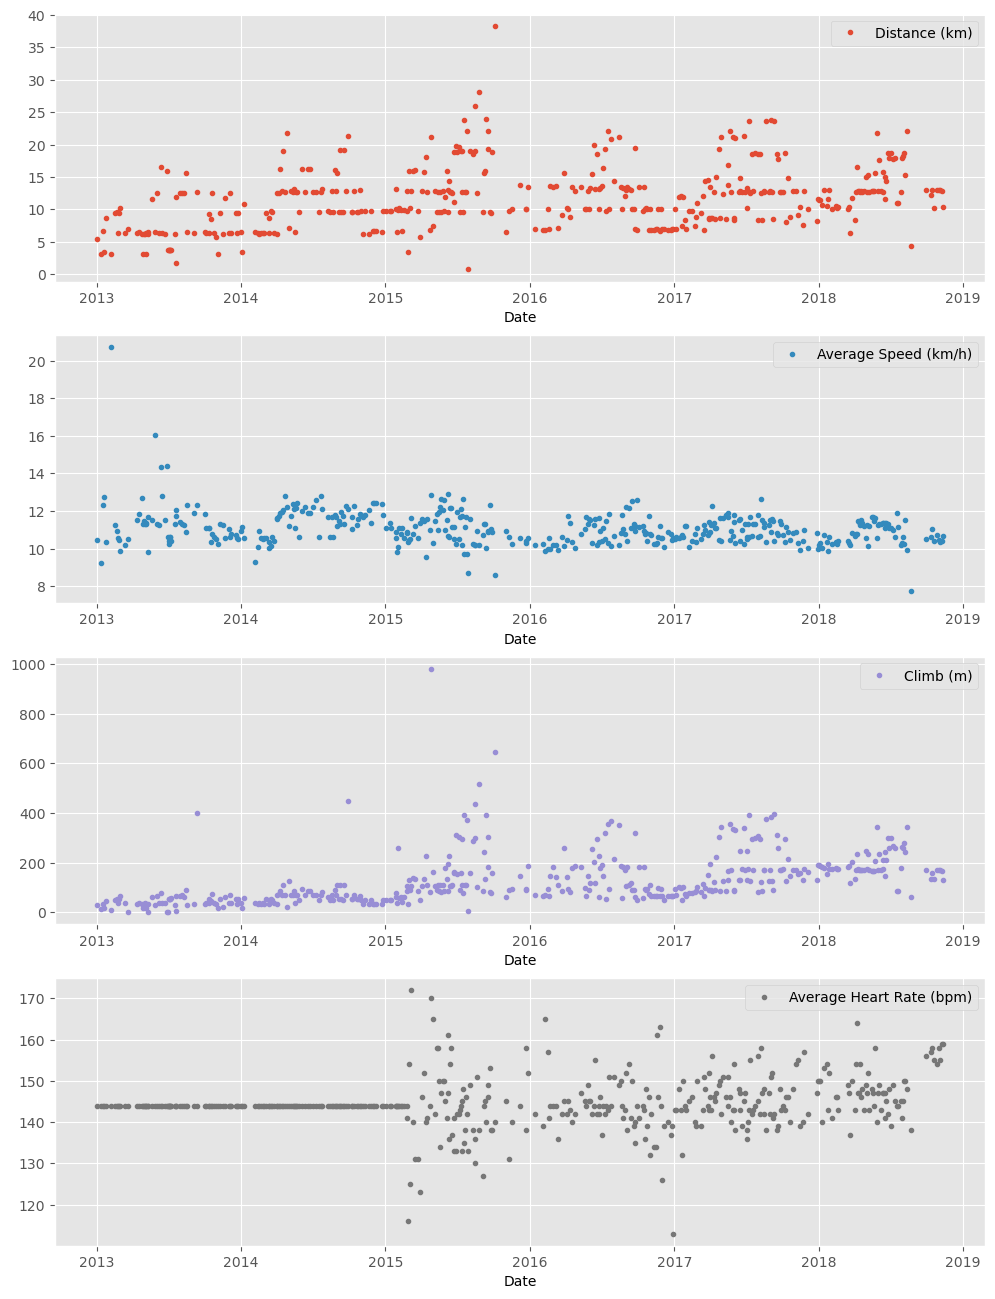

In [6]:


# Import matplotlib, set style and ignore warning
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Ensure the DataFrame index is sorted
df_run.sort_index(inplace=True)

# Prepare data subsetting period from 2013 till 2018
runs_subset_2013_2018 = df_run['2013-01-01':'2018-12-31']

# Create, plot and customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3)

# Show plot
plt.show()


## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [8]:
import pandas as pd

# Ensure the DataFrame index is sorted
df_run.sort_index(inplace=True)

# Prepare running data for the last 4 years
runs_subset_2015_2018 = df_run['2015-01-01':'2018-12-31']

# Filter numeric columns
numeric_cols = runs_subset_2015_2018.select_dtypes(include='number').columns
runs_subset_2015_2018_numeric = runs_subset_2015_2018[numeric_cols]

# Calculate annual statistics
print('How my average run looks in last 4 years:')
annual_stats = runs_subset_2015_2018_numeric.resample('Y').mean()
display(annual_stats)

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
weekly_stats = runs_subset_2015_2018_numeric.resample('W').mean()
display(weekly_stats)

# Mean weekly counts
weekly_counts_average = runs_subset_2015_2018.resample('W').size().mean()
print('How many trainings per week I had on average:', weekly_counts_average)


How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0


How many trainings per week I had on average: 1.5


## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

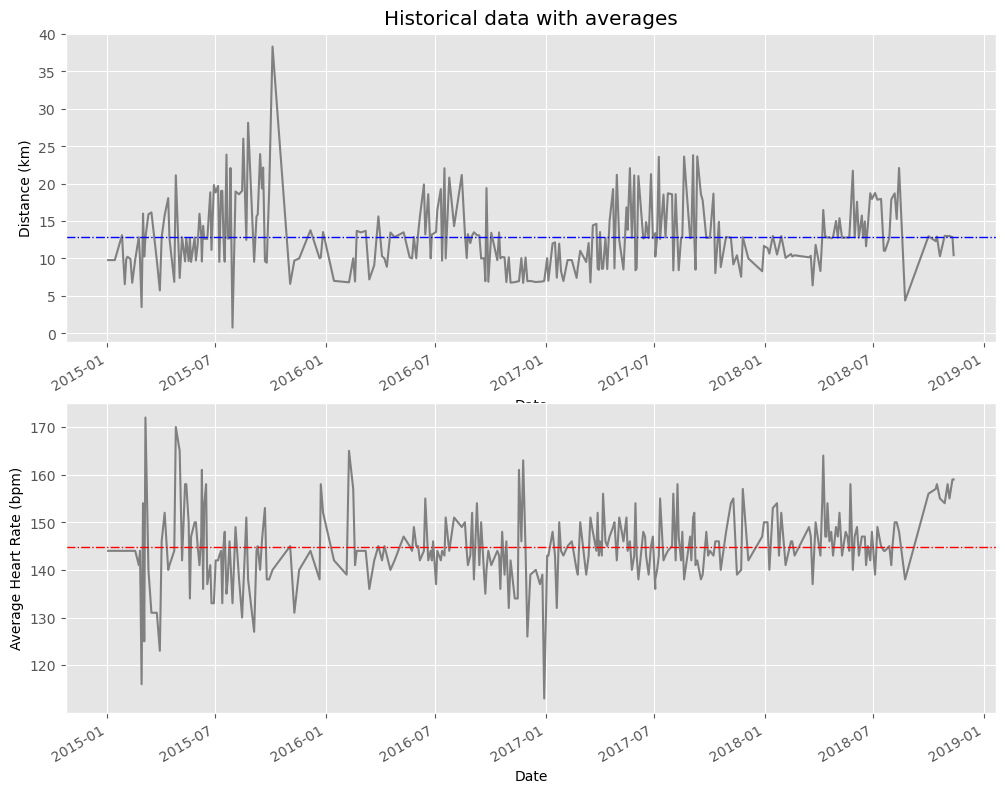

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data for plotting
runs_subset_2015_2018 = df_run['2015':'2018']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create the plot and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot and customize the first subplot
runs_distance.plot(ax=ax1, color='gray')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize the second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='red', linewidth=1, linestyle='-.')

# Show the plot
plt.show()


## 7. Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

ConversionError: Failed to convert value(s) to axis units: array([Period('2012', 'A-DEC'), Period('2013', 'A-DEC'),
       Period('2014', 'A-DEC'), Period('2015', 'A-DEC'),
       Period('2016', 'A-DEC'), Period('2017', 'A-DEC'),
       Period('2018', 'A-DEC')], dtype=object)

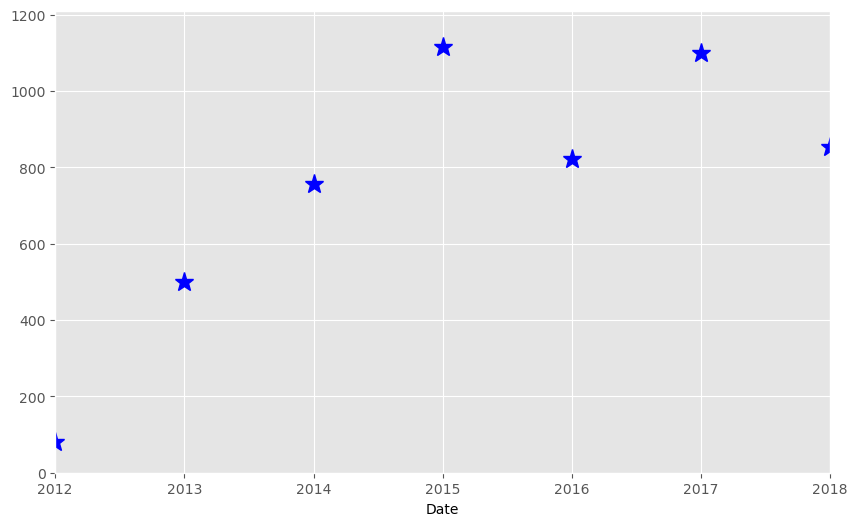

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_run_dist_annual is already defined and has the appropriate datetime index

# Convert PeriodIndex to string representing years
years = df_run_dist_annual.index.strftime('%Y')

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize
df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue', ax=ax)

ax.set(ylim=[0, 1210], 
       xlim=['2012', '2019'],  # Provide as string, not Period
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)

# Show plot
plt.show()


## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

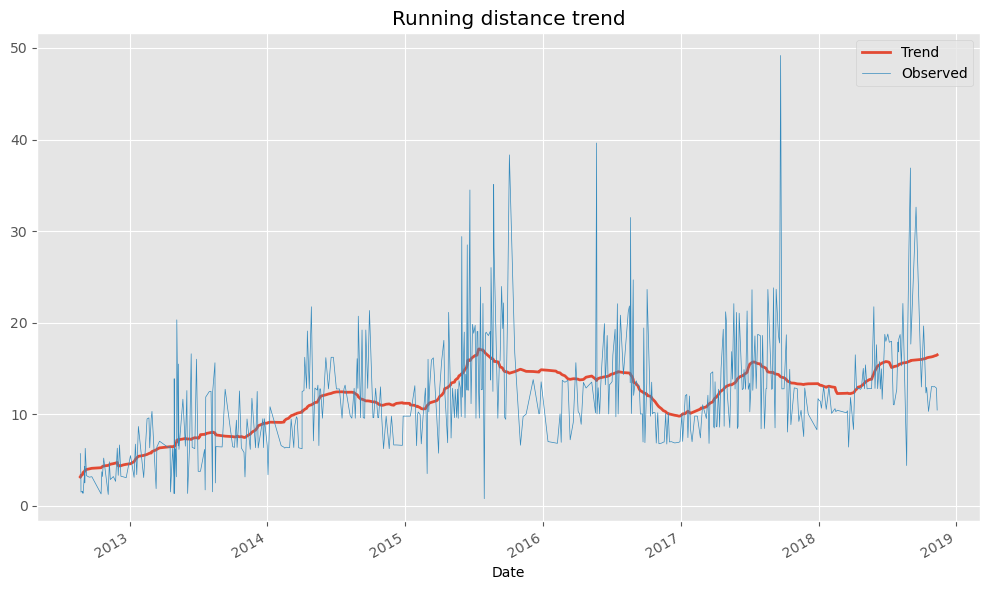

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data (assuming df_run_dist_wkly is defined with datetime index)
df_run_dist_wkly = pd.read_csv('datasets/cardioActivities.csv', parse_dates=True, index_col='Date')

# Perform seasonal decomposition with specified frequency (assuming weekly data, so period=52)
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly['Distance (km)'], 
                                       model='additive', 
                                       extrapolate_trend='freq', 
                                       period=52)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot and customize
decomposed.trend.plot(ax=ax, label='Trend', linewidth=2)
df_run_dist_wkly['Distance (km)'].plot(ax=ax, label='Observed', linewidth=0.5)

# Add title and legend
ax.set_title('Running distance trend')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

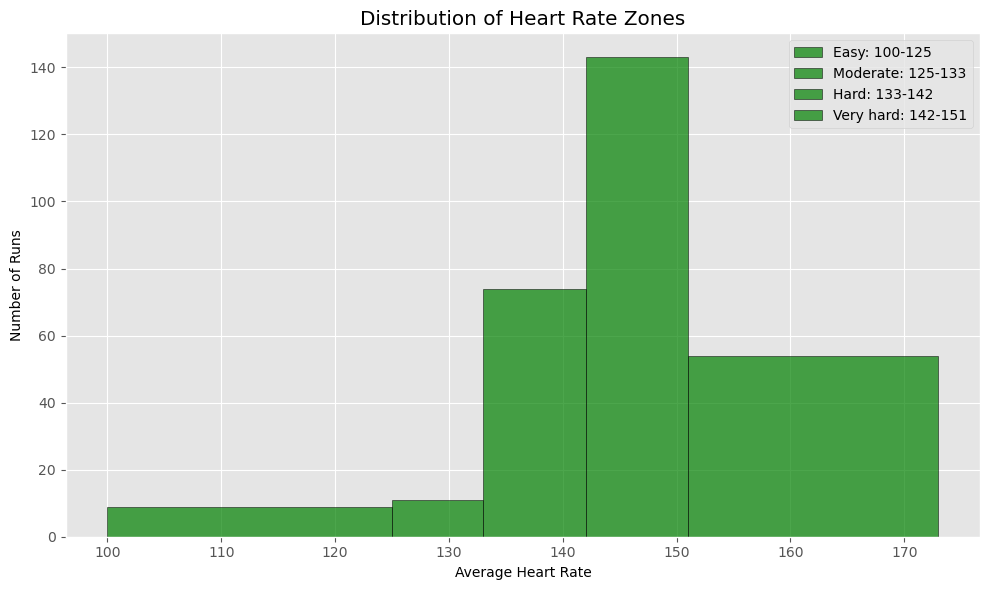

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your heart rate data from a CSV file
df_run_hr_all = pd.read_csv('datasets/cardioActivities.csv')

# Define heart rate zones and corresponding colors
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal']
zone_colors = ['green']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with specified colors
n, bins, patches = ax.hist(df_run_hr_all['Average Heart Rate (bpm)'], bins=hr_zones, alpha=0.7, color=zone_colors, edgecolor='black')

# Customizing patches to have different colors
for patch, color in zip(patches, zone_colors):
    patch.set_facecolor(color)

# Adding labels and title
ax.set(title='Distribution of Heart Rate Zones', xlabel='Average Heart Rate', ylabel='Number of Runs')

# Adding legend based on zone names
legend_labels = [f'{zone_names[i]}: {hr_zones[i]}-{hr_zones[i+1]}' for i in range(len(zone_names)-1)]
ax.legend(patches, legend_labels, loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [36]:
import pandas as pd
import numpy as np

# Example data
data_run = {
    'Type': ['Run', 'Run', 'Run', 'Run'],
    'Distance (km)': [5, 3, 4, 6],
    'Climb (m)': [50, 30, 40, 60],
    'Average Speed (km/h)': [10, 12, 9, 11]
}

data_walk = {
    'Type': ['Walk', 'Walk', 'Walk'],
    'Distance (km)': [2, 1, 3],
    'Climb (m)': [10, 5, 15],
    'Average Speed (km/h)': [5, 4, 6]
}

data_cycle = {
    'Type': ['Cycle', 'Cycle'],
    'Distance (km)': [10, 15],
    'Climb (m)': [100, 150],
    'Average Speed (km/h)': [20, 18]
}

# Create dataframes
df_run = pd.DataFrame(data_run)
df_walk = pd.DataFrame(data_walk)
df_cycle = pd.DataFrame(data_cycle)

# Concatenate dataframes
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle])

# Columns for analysis
dist_climb_cols = ['Distance (km)', 'Climb (m)']
speed_col = 'Average Speed (km/h)'

# Calculate totals for different training types
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculate summary statistics
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + [speed_col]].describe()

# Print summary statistics
print('Summary statistics for different training types:')
display(df_summary)


Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycle,25,250
Run,18,180
Walk,6,30


Summary statistics for different training types:


Distance (km)                                                 Climb (m)  \
              count  mean       std   min    25%   50%    75%   max     count   
Type                                                                            
Cycle           2.0  12.5  3.535534  10.0  11.25  12.5  13.75  15.0       2.0   
Run             4.0   4.5  1.290994   3.0   3.75   4.5   5.25   6.0       4.0   
Walk            3.0   2.0  1.000000   1.0   1.50   2.0   2.50   3.0       3.0   

              ...               Average Speed (km/h)                        \
        mean  ...    75%    max                count  mean       std   min   
Type          ...                                                            
Cycle  125.0  ...  137.5  150.0                  2.0  19.0  1.414214  18.0   
Run     45.0  ...   52.5   60.0                  4.0  10.5  1.290994   9.0   
Walk    10.0  ...   12.5   15.0                  3.0   5.0  1.000000   4.0   

                                 
         25%   50%    75%   max  
Type                             
Cycle  18.50  19.0  19.50  20.0  
Run     9.75  10.5  11.25  12.0  
Walk    4.50   5.0   5.50   6.0  

[3 rows x 24 columns]

## 11. Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [37]:
# Given average shoes per lifetime in kilometers per pair
average_shoes_lifetime = 800  # kilometers per pair

# Distance Forrest Gump ran
distance_forrest_run = 15248  # kilometers

# Calculate number of pairs of shoes needed
shoes_for_forrest_run = distance_forrest_run / average_shoes_lifetime

# Print the result
print('Forrest Gump would need {} pairs of shoes!'.format(shoes_for_forrest_run))


Forrest Gump would need 19.06 pairs of shoes!
